## Plastic gear loss estimates from remote observation of industrial fishing activity

**Brandon Kuczenski,* Camila Vargas, Eric L. Gilman, Michael Musyl, Roland Geyer, Jono Wilson**

`bkuczenski@ucsb.edu`

Submitted to _Science Advances_, 2021-04-09

Derelict fishing gear is a highly visible source of marine plastic pollution, causing
mortality and ecosystem degradation with unknown long-term consequences. The quantity
of derelict gear entering the oceans remains unknown because of heterogeneity in fishing
gear and effort and the lack of observation and monitoring. Prior studies have been limited
to specific fisheries and regions, and large-scale estimates lack an empirical basis. We
utilized remote observations of fishing vessel activity paired with technical fishing gear
models to generate a scoping estimate for gear lost during use worldwide in 2018. Median
estimates for plastic from industrial trawl, purse seine and pelagic longline fishing
amounted to 3.04-46.85 kt (1.88-87.83 kt with 95% confidence) while obtaining 49.6 Mt
of catch and discards. Our results provide a benchmark for more refined management of
fishing gears. Improved observation, especially of small-scale fisheries, is needed to better
understand the sources of derelict gear.

In [1]:
# Main Imports

SUFFIX = 'ops'


import sys
import os
addwd = os.path.abspath(os.path.join(os.getcwd(), '..'))
print('Adding path: %s' % addwd)
sys.path.append(addwd)

from math import prod, log10, floor, ceil
from statistics import median

from itertools import chain
import pandas as pd

Adding path: /data/GitHub/2021/scoping-gear-losses


In [3]:
# Graphics Imports + config

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
       

In [4]:
diss_to_ocean_fig = os.path.join(addwd,  'output', 'simulation', 'Dissipation-to-ocean_%s.pdf' % SUFFIX)
gear_intensity_fig = os.path.join(addwd,  'output', 'simulation', 'Gear-diss-intensity-fad_%s.pdf' % SUFFIX)
results_csv = os.path.join(addwd,  'output', 'simulation', 'gear-diss-results_%s.csv' % SUFFIX)

In [5]:
from fishery_model import tnc_gear_loss_params, simulation_table

from fishery_model.gear_loss_estimators import total_across, unit_samples, unit_diss

In [9]:
study = tnc_gear_loss_params(year='2018')
sgn = next(study.proxy_sets('set_gillnets'))
fad = next(study.proxy_sets('FADs'))

Adding catch quantity Kilowatt-hour proxy catch
Adding catch quantity Vessel meter LOA-hour proxy catch
Adding catch quantity Vessel gross tonnage-hour proxy catch
Adding scaling quantity Number of FADs
Adding effort model Fish Aggregating Devices - Tuna Purse Seine Fisheries
Adding gear intensity model Fish Aggregating Devices - Drifting FADs
Adding dissipation model Gilman prioritization - Drift gillnet
Adding dissipation model Gilman prioritization - Set and fixed gillnet
Adding dissipation model Gilman prioritization - Purse seine Non-tuna
Adding dissipation model Gilman prioritization - Boat Seine net
Adding dissipation model Gilman prioritization - Bottom trawl
Adding dissipation model Gilman prioritization - Pots
Adding dissipation model Gilman prioritization - Fyke net
Adding dissipation model Gilman prioritization - Pound net
Adding dissipation model Gilman prioritization - Tuna purse seine drifting FAD
Adding dissipation model Gilman prioritization - Tuna purse seine anchored

# Validation
If desired, you can bypass this section and skip down to "GFW Result Sets"

## Check operating-time equivalency by gear

In [7]:
from fishery_model.fishery import OP_EQUIV_DICT

In [10]:
# number of hours per year of vessel operation, according to the GFW dataset
{k: v['Fishing hour']/v['Year of operation'] for k, v in OP_EQUIV_DICT.items()}

{'drifting_longlines': 1545.2308057234372,
 'trawlers': 837.983893997561,
 'seiners': 445.21897040482594}

## Inspect key fishery parameters


`res_l_5` has 109 fisheries, each of which will be sampled during each Monte Carlo iteration. For a given fishery, I should expect:
 - the effort intensity should be lognormally distributed around the mean regression result
 - the gear intensity distribution for every fishery should look the same

In [11]:
res_l_5 = next(study.result_sets(gear='drifting_longlines', tau='0.5'))

In [12]:
res_l_5.N == 109

True

In [13]:
r0 = res_l_5[0]

In [14]:
round(r0.fishery.effort_moment(res_l_5._eff), 5) == 26.72437

True

In [15]:
round(r0.fishery.catch, 5) == 103.67188

True

In [16]:
# Now just do a couple iteration for each GFW fishery
study.n_gfw = 3

.
.
.
.
.
.
.
.
.


In [17]:
# the sample is random, but the catch should be as seen above
r0.detail(0)

{'name': '2018-AUS-drifting_longlines-FAO 57',
 'n_vessel': 7,
 'model': <unit_gears.query.GearModel at 0x7f0f5aae8e80>,
 'catch': 103.67187938945597,
 'sample': <unit_gears.query.SampleDetail at 0x7f0f5a7d9550>,
 'gear': 260.2551063153458,
 'dissipation': 6.658760840728141}

In [18]:
# (26.72436844390784, 222.38141147580296)
r0._m[0].effort.mean(r0._ep)

(26.72436844390784, 222.38141147580296)

In [19]:
r0._m[0].effort is r0._m[1].effort

True

In [20]:
sgn.total_catch['One tonne landed catch'] == 2542163.3513

True

In [21]:
ll = fad.models()

In [22]:
[str(k) for k in ll]

['Fish Aggregating Devices - Tuna Purse Seine Fisheries; Fish Aggregating Devices - Drifting FADs; Gilman prioritization - Tuna purse seine anchored FAD',
 'Fish Aggregating Devices - Tuna Purse Seine Fisheries; Fish Aggregating Devices - Drifting FADs; Gilman prioritization - Tuna purse seine drifting FAD']

In [23]:
res_s_5 = next(study.result_sets(gear='seiners', tau='0.5'))
[str(k) for k in res_s_5.models()]

['GFW Regression, seiners, total_f_hours_tonnage, 0.5; Seiners - reported; Expert Reports - Purse Seine Tuna',
 'GFW Regression, seiners, total_f_hours_tonnage, 0.5; Seiners - reported; Gilman prioritization - Boat Seine net',
 'GFW Regression, seiners, total_f_hours_tonnage, 0.5; Seiners - reported; Gilman prioritization - Purse seine Non-tuna',
 'GFW Regression, seiners, total_f_hours_tonnage, 0.5; Seiners - reported; Norway - Danish Seine - Lost to ocean',
 'GFW Regression, seiners, total_f_hours_tonnage, 0.5; Seiners - reported; Norway - Purse Seine - Lost to ocean']

In [24]:
# 'y ~ 10 ** 0:1.27 N;1:0.000604 N (x)'
str(res_s_5[0]._m[3].effort._model)

'y ~ 10 ** 0:1.27 N;1:0.000604 N (x)'

In [25]:
# unit tests
res_s_9 = next(study.result_sets(gear='seiners', tau='0.9'))
assert round(res_s_9[0].fishery.effort_moment(res_s_5._eff), 2) == 318.88
assert res_s_9[0].fishery.name == '2018-AGO-seiners-FAO 47'
assert str(res_s_5[0]._m[3].effort._model) == 'y ~ 10 ** 0:1.27 N;1:0.000604 N (x)'  # was 'y ~ 10 ** 0:1.52 N;1:0.000672 (x)

In [26]:
round(next(study.result_sets(gear='seiners')).total_catch['One tonne capture']) == 22955837

True

In [27]:
round(next(study.result_sets(gear='trawlers')).total_catch['One tonne capture']) == 25532964

True

In [28]:
# percent of global capture that has been matched to GFW fisheries
sum(k.total_catch['One tonne capture'] for k in study.result_sets(tau='0.9'))/91818107


0.5407507399198972

# Run Simulations
First do the proxy systems because they are faster.

.
.


<AxesSubplot:ylabel='Count'>

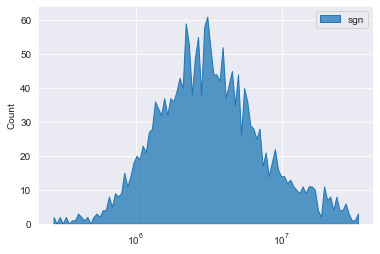

In [29]:
## Set Gillnets
# this one takes about 10 sec to run the gillnet simulation and about 30 sec for PS FADs

study.n_prox = 2000

sns.histplot({'sgn': total_across(sgn)}, element='poly', log_scale=True, bins=100)

<AxesSubplot:ylabel='Count'>

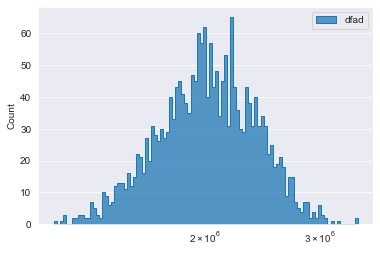

In [42]:
sns.histplot({'dfad': total_across(fad)}, element='step', log_scale=True, bins=100)

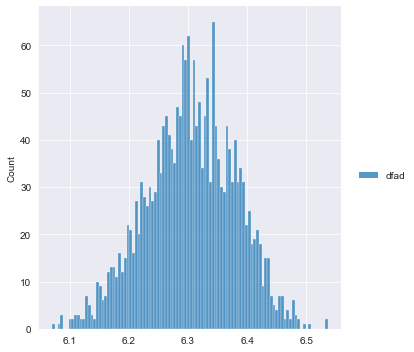

In [41]:
sns.displot({'dfad': [log10(k) for k in total_across(fad)]}, bins=100)

In [43]:
study.n_gfw = 500  # takes ~2 minutes - run the first 500 iterations for GFW result sets

.
.
.
.
.
.
.
.
.


<AxesSubplot:ylabel='Count'>

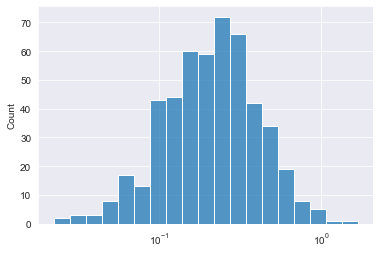

In [44]:
# this is the combined unit dissipation rate for one fishery
sns.histplot(list(res_l_5[0].samples), log_scale=True)

### Gear Intensity
The following 3 charts should all look roughly (probabilistically) the same -- all fisheries use the same
gear intensity model.

<AxesSubplot:ylabel='Count'>

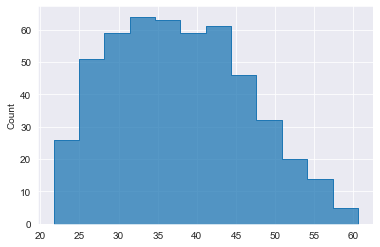

In [45]:
sns.histplot([res_l_5[0].detail(k)['sample'].gear for k in range(r0.n)], log_scale=False, element='step')

<AxesSubplot:ylabel='Count'>

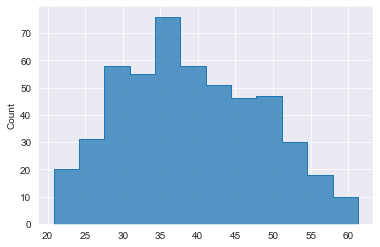

In [46]:
sns.histplot([res_l_5[1].detail(k)['sample'].gear for k in range(r0.n)], log_scale=False, element='step')

<AxesSubplot:ylabel='Count'>

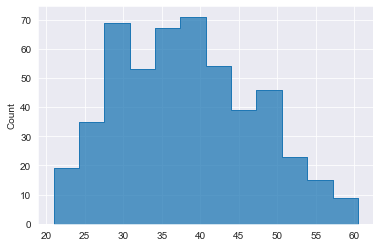

In [47]:
sns.histplot([res_l_5[2].detail(k)['sample'].gear for k in range(r0.n)], log_scale=False, element='step')

# GFW Result Sets

In [48]:
### Continuation-- upsample to n=3000 -- 10-15 min, depending on whether you already ran the first n=500

%time study.n_gfw = 3000
%time study.n_prox = 3000

.
.
.
.
.
.
.
.
.
CPU times: user 9min 46s, sys: 2.43 s, total: 9min 48s
Wall time: 9min 51s
.
.
CPU times: user 15.8 s, sys: 89.2 ms, total: 15.9 s
Wall time: 15.9 s


## Total Results
4-facet plot

This sums the ith random sample across all fisheries to compute total gear use / plastic flows for that simulation.

tau represents the quantile regression fit parameter. The effort intensity model is applied as a first order filter with normal uncertainty on the y-intercept,  but with the slope being static for numerical stability.

In [49]:
from fishery_model.simulation_plots import total_dissipation_fig, intensity_fig

[211431.0044699111, 403489659.11782753]


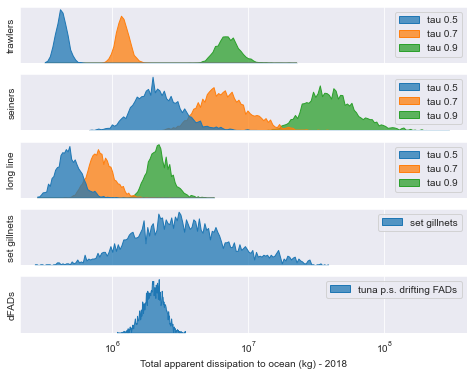

In [50]:
f = total_dissipation_fig(study)
plt.savefig(diss_to_ocean_fig, bbox_inches='tight')

In [51]:
res = next(study.result_sets(gear='seiners', tau='0.7'))

In [54]:
res.N

93

In [55]:
len(res.details(2))

93

In [58]:
res.scores(1) == [k['dissipation'] for k in res.details(1)]

True

In [62]:
ta = total_across(res)

In [63]:
len(ta)

3000

In [67]:
tb = [sum(k['dissipation'] for k in res.details(j)) for j in range(res.n)]

In [69]:
ta == tb

True

In [61]:
sum([k['gear'] for k in res.details(100)])

199502646.99071696

In [72]:
def total_operation(_res):
    # total operation across all fisheries - this is kg*hour of gear dragged through the water for the iteration
    return [sum([k['gear'] for k in _res.details(j)]) for j in range(_res.N)]


In [88]:
"""
This figure is no good-- too duplicative of the dissipation figure, and the proxy gear operation results
don't make sense
"""

_element = 'poly'  # or 'step'



def dissipation_w_op_fig(study):
    
    def _axen(_gear, _row, _a, _b, bins=100):
        _ri = _row * 2
        _axl = plt.subplot(5, 2, _ri - 1)
        sns.histplot(_a, element=_element, log_scale= True, bins=bins, ax=_axl)
        _axl.set_ylabel(_gear)
        
        _axr = plt.subplot(5, 2, _ri)
        sns.histplot(_b, element=_element, log_scale=True, bins=bins, ax=_axr)
        _axr.set_ylabel(_gear)
        
        return _axl, _axr

    dfll = pd.DataFrame({'tau %s' % k.tau: total_across(k) for k in study.result_sets(gear='drifting_longlines')})
    dftw = pd.DataFrame({'tau %s' % k.tau: total_across(k) for k in study.result_sets(gear='trawlers')})
    dfsn = pd.DataFrame({'tau %s' % k.tau: total_across(k) for k in study.result_sets(gear='seiners')})

    goll = pd.DataFrame({'tau %s' % k.tau: total_operation(k) for k in study.result_sets(gear='drifting_longlines')})
    gotw = pd.DataFrame({'tau %s' % k.tau: total_operation(k) for k in study.result_sets(gear='trawlers')})
    gosn = pd.DataFrame({'tau %s' % k.tau: total_operation(k) for k in study.result_sets(gear='seiners')})

    sgn = next(study.proxy_sets('set_gillnets'))
    fad = next(study.proxy_sets('FADs'))

    # This is facet a of 4-facet plot with shared x axis
    f = plt.figure(figsize=(12, 7.5))

    ax1, ax2 = _axen('trawlers', 1, gotw, dftw)
    ax3, ax4 = _axen('seiners', 2, gosn, dfsn, bins=160)
    ax5, ax6 = _axen('long line', 3, goll, dfll)
    ax7, ax8 = _axen('set gillnets', 4, 
                     {'set gillnets': total_operation(sgn)}, 
                     {'set gillnets': total_across(sgn)}, bins=160)
    ax9, ax10 = _axen('dFADs', 5, 
                     {'tuna p.s. drifting FADs': total_operation(fad)}, 
                     {'tuna p.s. drifting FADs': total_across(fad)}, bins=160)
    
    
    _set_all_xlims([ax1, ax3, ax5, ax7, ax9])
    _set_all_xlims([ax2, ax4, ax6, ax8, ax10])
    ax9.set_xlabel('Total gear operation (kg*h) - 2018')
    ax10.set_xlabel('Total apparent dissipation to ocean (kg) - 2018')

    for ax in (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8):
        ax.set_xticklabels([])

    return f


In [74]:
def _set_all_xlims(axen):
    _x = ()
    for ax in axen:
        ax.set_yticks([])
        _xl = ax.get_xlim()
        if _x == ():
            _x = _xl
        else:
            _x = [min([_x[0], _xl[0]]), max([_x[1], _xl[1]])]
    print(_x)
    for ax in axen:
        ax.set_xlim(_x)


[3214430.4545159074, 3675682219.553516]
[211431.0044699111, 403489659.11782753]


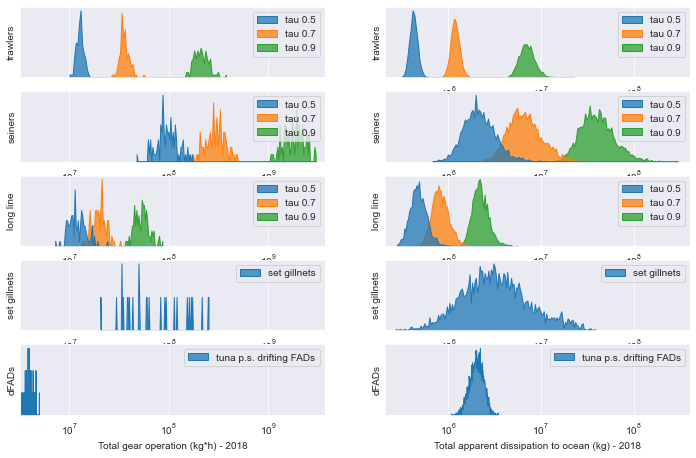

In [89]:
f = dissipation_w_op_fig(study)
plt.savefig('diss_w_op.pdf', bbox_inches='tight')

## Unit Catch Basis
We actually have 4 different possible plots (times 3 different gears):
 - gear use per tonne of catch [per year]
 - gear use per vessel per year
 - dissipation per tonne of catch
 - dissipation per vessel
 
Let's get each individual one working and then try a couple of different ways to overlay them.

This could be a 2/3 page figure with 6, 9, or 12 panes.



This is just going to be unit basis of fig4

so it will be a stack of 3 axes- why not a seaborn style? bc I haven't gotten it to work
but 

[0.0007658611107534299, 230315.22908636997]
[8.431391122905164e-06, 6396.854399524539]


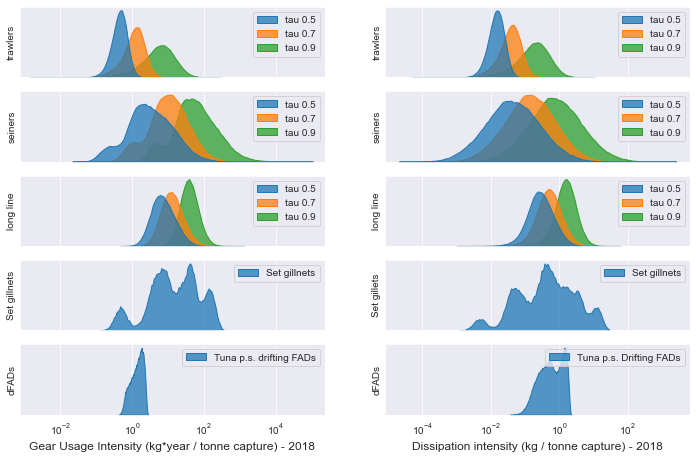

In [36]:
f = intensity_fig(study)
plt.savefig(gear_intensity_fig, bbox_inches='tight')

In [102]:
_element = 'poly'  # or 'step'

def intensity_fig(study):
    
    def _axen(_gear, _row, _a, _b, bins=20):
        _ri = _row * 2
        _axl = plt.subplot(5, 2, _ri - 1)
        sns.histplot(_a, element=_element, log_scale= True, ax=_axl, fill=False)
        _axl.set_ylabel(_gear)
        
        _axr = plt.subplot(5, 2, _ri)
        sns.histplot(_b, element=_element, log_scale=True, ax=_axr, fill=False)
        _axr.set_ylabel(_gear)
        
        return _axl, _axr

    sgn = next(study.proxy_sets('set_gillnets'))
    fad = next(study.proxy_sets('FADs'))

    # This is facet a of 4-facet plot with shared x axis
    f = plt.figure(figsize=(12, 7.5))

    ax1, ax2 = _axen('trawlers', 1, ustw, udtw)
    ax3, ax4 = _axen('seiners', 2, ussn, udsn, bins=30)
    ax5, ax6 = _axen('long line', 3, usll, udll)
    ax7, ax8 = _axen('set gillnets', 4, 
                     {'set gillnets': unit_samples(sgn)}, 
                     {'set gillnets': unit_diss(sgn)}, bins=30)
    ax9, ax10 = _axen('dFADs', 5, 
                     {'tuna p.s. drifting FADs': unit_samples(fad)}, 
                     {'tuna p.s. drifting FADs': unit_diss(fad)}, bins=10)
    
    
    _set_all_xlims([ax1, ax3, ax5, ax7, ax9])
    _set_all_xlims([ax2, ax4, ax6, ax8, ax10])
    ax9.set_xlabel('Gear Usage Intensity (kg*year / tonne capture) - 2018')
    ax10.set_xlabel('Dissipation intensity (kg / tonne capture) - 2018')

    for ax in (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8):
        ax.set_xticklabels([])

    return f


In [92]:
    udll = pd.DataFrame({'tau %s' % k.tau: unit_diss(k) for k in study.result_sets(gear='drifting_longlines')})
    udtw = pd.DataFrame({'tau %s' % k.tau: unit_diss(k) for k in study.result_sets(gear='trawlers')})
    udsn = pd.DataFrame({'tau %s' % k.tau: unit_diss(k) for k in study.result_sets(gear='seiners')})

    usll = pd.DataFrame({'tau %s' % k.tau: unit_samples(k) for k in study.result_sets(gear='drifting_longlines')})
    ustw = pd.DataFrame({'tau %s' % k.tau: unit_samples(k) for k in study.result_sets(gear='trawlers')})
    ussn = pd.DataFrame({'tau %s' % k.tau: unit_samples(k) for k in study.result_sets(gear='seiners')})



[0.0009424146172051653, 157226.69372689145]
[6.351598576722606e-06, 12266.233477458054]


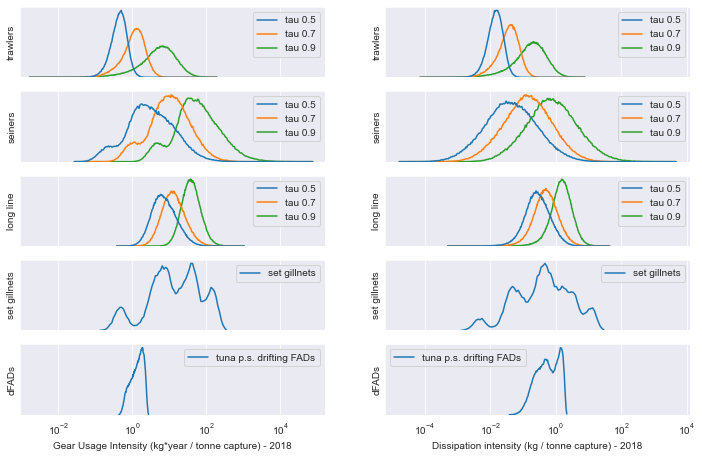

In [103]:
f = intensity_fig(study)
plt.savefig('intensity-outline.pdf', bbox_inches='tight')

In [98]:
from fishery_model import _make_pd_row

def simulation_table(study):
    stats = [('Trawlers', float(k.tau), k) for k in sorted(study.result_sets(gear='trawlers'), key=lambda x: x.tau)]
    stats.extend([('Seiners', float(k.tau), k) for k in sorted(study.result_sets(gear='seiners'), key=lambda x: x.tau)])
    stats.extend([('Longlines', float(k.tau), k)
                  for k in sorted(study.result_sets(gear='drifting_longlines'), key=lambda x: x.tau)])
    stats.append(('Set Gillnets', pd.NA, next(study.proxy_sets(gear='set_gillnets'))))
    stats.append(('Drifting FADs', pd.NA, next(study.proxy_sets(gear='FADs'))))
    return pd.DataFrame((_make_pd_row(k, l, unit=list(unit_samples(m)), oper=total_operation(m), diss=total_across(m)) for k, l, m in stats))


In [99]:
tab3o = simulation_table(study)
tab3o

,Gear,tau,unit_median,unit_05,unit_95,oper_median,oper_05,oper_95,diss_median,diss_05,diss_95
0,Trawlers,0.5,0.451,0.181,0.919,1.28e+07,1.11e+07,1.47e+07,4.23e+05,3.63e+05,4.99e+05
1,Trawlers,0.7,1.17,0.279,3.01,3.49e+07,3.06e+07,4.33e+07,1.18e+06,1e+06,1.43e+06
2,Trawlers,0.9,5.55,0.564,24.5,2.1e+08,1.65e+08,2.85e+08,7.02e+06,5.26e+06,9.87e+06
3,Seiners,0.5,2.94,0.223,35.6,9.47e+07,6.33e+07,1.53e+08,2.12e+06,1.19e+06,4.41e+06
4,Seiners,0.7,10.2,0.909,79,2.97e+08,2.02e+08,4.37e+08,6.47e+06,3.62e+06,1.43e+07
5,Seiners,0.9,52.8,4.44,596,1.83e+09,1.22e+09,2.57e+09,3.92e+07,2.15e+07,8.65e+07
6,Longlines,0.5,7,2.32,27.1,1.15e+07,9.16e+06,1.71e+07,4.72e+05,3.44e+05,6.8e+05
7,Longlines,0.7,12.7,4.26,45.2,1.98e+07,1.56e+07,2.63e+07,8.11e+05,5.96e+05,1.2e+06
8,Longlines,0.9,38.5,15.3,104,5.33e+07,4.18e+07,7.13e+07,2.18e+06,1.64e+06,3.14e+06
9,Set Gillnets,<NA>,14.7,0.503,166,6.01e+07,2.97e+07,2.53e+08,3.08e+06,8.77e+05,1.51e+07


In [104]:
print(tab3o.to_latex(index=False))

\begin{tabular}{lllllllllll}
\toprule
         Gear &  tau & unit\_median & unit\_05 & unit\_95 & oper\_median &  oper\_05 &  oper\_95 & diss\_median &  diss\_05 &  diss\_95 \\
\midrule
     Trawlers &  0.5 &       0.451 &   0.181 &   0.919 &    1.28e+07 & 1.11e+07 & 1.47e+07 &    4.23e+05 & 3.63e+05 & 4.99e+05 \\
     Trawlers &  0.7 &        1.17 &   0.279 &    3.01 &    3.49e+07 & 3.06e+07 & 4.33e+07 &    1.18e+06 &    1e+06 & 1.43e+06 \\
     Trawlers &  0.9 &        5.55 &   0.564 &    24.5 &     2.1e+08 & 1.65e+08 & 2.85e+08 &    7.02e+06 & 5.26e+06 & 9.87e+06 \\
      Seiners &  0.5 &        2.94 &   0.223 &    35.6 &    9.47e+07 & 6.33e+07 & 1.53e+08 &    2.12e+06 & 1.19e+06 & 4.41e+06 \\
      Seiners &  0.7 &        10.2 &   0.909 &      79 &    2.97e+08 & 2.02e+08 & 4.37e+08 &    6.47e+06 & 3.62e+06 & 1.43e+07 \\
      Seiners &  0.9 &        52.8 &    4.44 &     596 &    1.83e+09 & 1.22e+09 & 2.57e+09 &    3.92e+07 & 2.15e+07 & 8.65e+07 \\
    Longlines &  0.5 &           7

In [106]:
tab3o.to_csv(results_csv, index=False)
print(tab3o.to_csv(index=False))

Gear,tau,unit_median,unit_05,unit_95,oper_median,oper_05,oper_95,diss_median,diss_05,diss_95
Trawlers,0.5,0.451,0.181,0.919,1.28e+07,1.11e+07,1.47e+07,4.23e+05,3.63e+05,4.99e+05
Trawlers,0.7,1.17,0.279,3.01,3.49e+07,3.06e+07,4.33e+07,1.18e+06,1e+06,1.43e+06
Trawlers,0.9,5.55,0.564,24.5,2.1e+08,1.65e+08,2.85e+08,7.02e+06,5.26e+06,9.87e+06
Seiners,0.5,2.94,0.223,35.6,9.47e+07,6.33e+07,1.53e+08,2.12e+06,1.19e+06,4.41e+06
Seiners,0.7,10.2,0.909,79,2.97e+08,2.02e+08,4.37e+08,6.47e+06,3.62e+06,1.43e+07
Seiners,0.9,52.8,4.44,596,1.83e+09,1.22e+09,2.57e+09,3.92e+07,2.15e+07,8.65e+07
Longlines,0.5,7,2.32,27.1,1.15e+07,9.16e+06,1.71e+07,4.72e+05,3.44e+05,6.8e+05
Longlines,0.7,12.7,4.26,45.2,1.98e+07,1.56e+07,2.63e+07,8.11e+05,5.96e+05,1.2e+06
Longlines,0.9,38.5,15.3,104,5.33e+07,4.18e+07,7.13e+07,2.18e+06,1.64e+06,3.14e+06
Set Gillnets,,14.7,0.503,166,6.01e+07,2.97e+07,2.53e+08,3.08e+06,8.77e+05,1.51e+07
Drifting FADs,,1.42,0.651,2.29,3.94e+06,3.45e+06,4.58e+06,2.02e+06,1.5e+06,2.62e+06



In [107]:
tab3o.pivot(index='tau', columns='Gear', values='diss_median').fillna(0.0).astype(float).sum(axis=1)

tau
NaN     5100000.0
0.5     3015000.0
0.7     8461000.0
0.9    48400000.0
dtype: float64

In [110]:
tab3o.pivot(index='tau', columns='Gear', values='oper_median').fillna(0.0).astype(float).sum(axis=1)

tau
NaN    6.404000e+07
0.5    1.190000e+08
0.7    3.517000e+08
0.9    2.093300e+09
dtype: float64

In [37]:
# takes roughly 20 s, again for unit_samples and total_across
from fishery_model import simulation_table
tab3 = simulation_table(study)

In [38]:
tab3

,Gear,tau,unit_median,unit_05,unit_95,diss_median,diss_05,diss_95
0,Trawlers,0.5,0.451,0.182,0.922,4.24e+05,3.62e+05,4.97e+05
1,Trawlers,0.7,1.17,0.278,3.02,1.19e+06,1.01e+06,1.44e+06
2,Trawlers,0.9,5.56,0.566,24.5,6.93e+06,5.32e+06,9.77e+06
3,Seiners,0.5,2.94,0.223,35.5,2.2e+06,1.23e+06,4.53e+06
4,Seiners,0.7,10.2,0.907,78.8,6.59e+06,3.59e+06,1.44e+07
5,Seiners,0.9,53,4.4,594,3.91e+07,2.14e+07,8.71e+07
6,Longlines,0.5,7.02,2.32,27.1,4.67e+05,3.51e+05,6.78e+05
7,Longlines,0.7,12.7,4.28,45.3,8.13e+05,5.98e+05,1.21e+06
8,Longlines,0.9,38.5,15.3,105,2.19e+06,1.66e+06,3.07e+06
9,Set Gillnets,<NA>,14.9,0.502,166,3.15e+06,8.86e+05,1.56e+07


In [39]:
print(tab3.to_latex(index=False))

\begin{tabular}{llllllll}
\toprule
          Gear &   tau & unit\_median & unit\_05 & unit\_95 & diss\_median &   diss\_05 &   diss\_95 \\
\midrule
      Trawlers &   0.5 &       0.451 &   0.182 &   0.922 &    4.24e+05 &  3.62e+05 &  4.97e+05 \\
      Trawlers &   0.7 &        1.17 &   0.278 &    3.02 &    1.19e+06 &  1.01e+06 &  1.44e+06 \\
      Trawlers &   0.9 &        5.56 &   0.566 &    24.5 &    6.93e+06 &  5.32e+06 &  9.77e+06 \\
       Seiners &   0.5 &        2.94 &   0.223 &    35.5 &     2.2e+06 &  1.23e+06 &  4.53e+06 \\
       Seiners &   0.7 &        10.2 &   0.907 &    78.8 &    6.59e+06 &  3.59e+06 &  1.44e+07 \\
       Seiners &   0.9 &          53 &     4.4 &     594 &    3.91e+07 &  2.14e+07 &  8.71e+07 \\
     Longlines &   0.5 &        7.02 &    2.32 &    27.1 &    4.67e+05 &  3.51e+05 &  6.78e+05 \\
     Longlines &   0.7 &        12.7 &    4.28 &    45.3 &    8.13e+05 &  5.98e+05 &  1.21e+06 \\
     Longlines &   0.9 &        38.5 &    15.3 &     105 &    2.19e+

In [40]:
tab3.to_csv(results_csv, index=False)

In [41]:
print(tab3.to_csv(index=False))

Gear,tau,unit_median,unit_05,unit_95,diss_median,diss_05,diss_95
Trawlers,0.5,0.451,0.182,0.922,4.24e+05,3.62e+05,4.97e+05
Trawlers,0.7,1.17,0.278,3.02,1.19e+06,1.01e+06,1.44e+06
Trawlers,0.9,5.56,0.566,24.5,6.93e+06,5.32e+06,9.77e+06
Seiners,0.5,2.94,0.223,35.5,2.2e+06,1.23e+06,4.53e+06
Seiners,0.7,10.2,0.907,78.8,6.59e+06,3.59e+06,1.44e+07
Seiners,0.9,53,4.4,594,3.91e+07,2.14e+07,8.71e+07
Longlines,0.5,7.02,2.32,27.1,4.67e+05,3.51e+05,6.78e+05
Longlines,0.7,12.7,4.28,45.3,8.13e+05,5.98e+05,1.21e+06
Longlines,0.9,38.5,15.3,105,2.19e+06,1.66e+06,3.07e+06
Set Gillnets,,14.9,0.502,166,3.15e+06,8.86e+05,1.56e+07
Drifting FADs,,1.42,0.65,2.29,2.03e+06,1.5e+06,2.64e+06



In [42]:
tab3.pivot(index='tau', columns='Gear', values='diss_median').fillna(0.0).astype(float).sum(axis=1)

tau
NaN     5180000.0
0.5     3091000.0
0.7     8593000.0
0.9    48220000.0
dtype: float64

#### 

In [52]:
r_cm = 0.2  # = 1.4mm line
# g/cm3 * cm * cm * pi = g/cm
1.15 * r_cm * r_cm * 3.14159

0.14451313999999998

In [58]:
r_cm = 0.07
# g/cm * cm/m * m/mi * kg/g * lb/kg == lb/mi
print('d = %g mm' % (r_cm * 20))
w = 1.15 * r_cm * r_cm * 3.14159 *100 * 1609 * .001 * 2.204
print('w = %.3g lb/mi' % w)

d = 1.4 mm
w = 6.28 lb/mi
